In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

In [15]:
service = QiskitRuntimeService(instance='ibm-q/open/main')
backends = service.backends()
print(backends)

[<IBMBackend('ibmq_quito')>, <IBMBackend('ibmq_belem')>, <IBMBackend('simulator_mps')>, <IBMBackend('ibmq_manila')>, <IBMBackend('ibm_nairobi')>, <IBMBackend('ibm_lagos')>, <IBMBackend('ibm_perth')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('ibmq_lima')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('ibmq_jakarta')>]


In [16]:
import qiskit
# help(qiskit)

In [17]:
from qiskit import QuantumCircuit

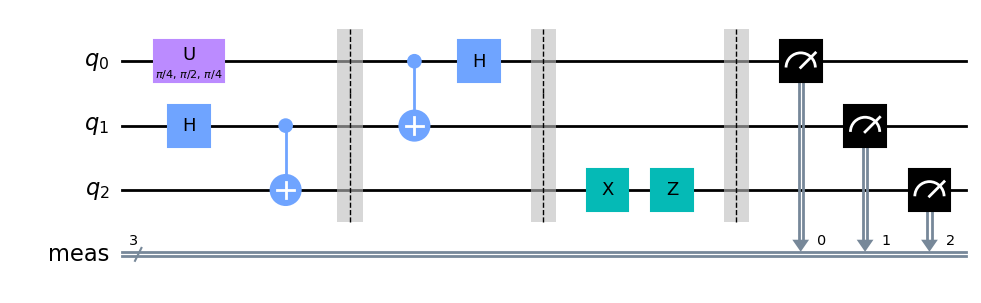

In [64]:
qc_tp = QuantumCircuit(3)
from math import pi
theta = pi/4
phi = pi/2
lambda_param = pi/4
qc_tp.u(theta, phi, lambda_param, 0)
qc_tp.h(1)
qc_tp.cx(1,2)
qc_tp.barrier()
qc_tp.cx(0,1)
qc_tp.h(0)
qc_tp.barrier()
qc_tp.x(2)
qc_tp.z(2)
qc_tp.measure_all()
qc_tp.draw('mpl')

In [65]:
job = Sampler(session='ibmq_qasm_simulator').run(qc_tp)

In [66]:
job.result()

SamplerResult(quasi_dists=[{1: 0.04275, 5: 0.21625, 0: 0.03225, 3: 0.2125, 7: 0.04, 2: 0.21175, 4: 0.21025, 6: 0.03425}], metadata=[{'shots': 4000}])

In [67]:
counts = job.result()
print(counts)

SamplerResult(quasi_dists=[{1: 0.04275, 5: 0.21625, 0: 0.03225, 3: 0.2125, 7: 0.04, 2: 0.21175, 4: 0.21025, 6: 0.03425}], metadata=[{'shots': 4000}])


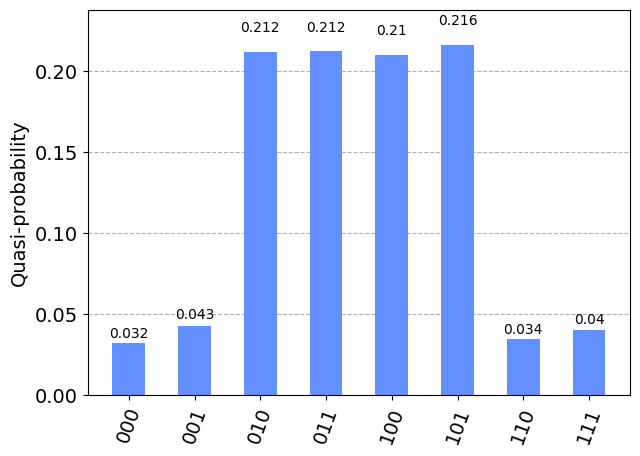

In [68]:
counts = job.result().quasi_dists[0].binary_probabilities()
from qiskit.visualization import plot_histogram
plot_histogram(counts)